In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv('./Datasets/Question-4/weather.csv')
#df_train,df_test=train_test_split(np.array(df), test_size=0.2)

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [4]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992650,-0.631860,0.006087,0.028669,0.393023,-0.008325
Apparent Temperature (C),0.992650,1.000000,-0.602287,-0.059701,0.027553,0.381814,-0.002696
Humidity,-0.631860,-0.602287,1.000000,-0.222247,0.001742,-0.370555,0.007628
Wind Speed (km/h),0.006087,-0.059701,-0.222247,1.000000,0.104298,0.100110,-0.048356
Wind Bearing (degrees),0.028669,0.027553,0.001742,0.104298,1.000000,0.048980,-0.010738
Visibility (km),0.393023,0.381814,-0.370555,0.100110,0.048980,1.000000,0.058638
Pressure (millibars),-0.008325,-0.002696,0.007628,-0.048356,-0.010738,0.058638,1.000000


In [5]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(77285, 11)


In [6]:
X_train,X_test = train_test_split(np.array(df), test_size=0.2,random_state=40)
#print(type(X_train))
#print(type(X_test))
X_tr = X_train[:,3:8]
Y_tr = X_train[:,4:5]

X_ts = X_test[:,3:8]
Y_ts = X_test[:,4:5]

In [7]:
#print(type(X_tr))
print(X_tr.shape)
#print(type(Y_tr))
print(Y_tr.shape)
print(X_ts.shape)
print(Y_ts.shape)

(61828, 5)
(61828, 1)
(15457, 5)
(15457, 1)


In [8]:
class Airfoil:
    def getPredict(self,coeffs,row):
        yPred=coeffs[0]
        for i in range(1,len(coeffs)):
            yPred=yPred+(coeffs[i]*row[i-1])
        return yPred
    
    def fit(self,X,Y,initial_value,iterations,l_rate):
        coeffs = []
        #l_rate = 0.001
        for i in range(0,len(X[0])+1):
            coeffs.append(initial_value)
        for i in range(iterations):
            for j in range(len(X)):
                yPred=self.getPredict(coeffs,X[j])
                error=yPred-Y[j]
                coeffs[0]-=l_rate*error
                for k in range(len(X[j])):
                    coeffs[k+1]-=l_rate*error*X[j][k]
        return coeffs


In [9]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true-y_pred))

In [10]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_tr)  #normalizing data
Y_test=scaler.fit_transform(X_ts)


airFoil=Airfoil()
initial_value=[0.0,2.5,5.0,7.5,10.0]
iterations=[50,75,100]
l_rate=0.001

r2_scr=[]
m_sq_error=[]
m_abs_error=[]
m_abs_per_error=[]

for i in range(len(initial_value)):
    r_score = []
    mean_sq_error = []
    mean_abs_error = []
    mean_abs_per_error = []
    for j in range(len(iterations)):
        coefficient=airFoil.fit(X_train,Y_tr,initial_value[i],iterations[j],l_rate)
        predictions=[]
        for k in range(len(Y_test)):
            predictions.append(airFoil.getPredict(coefficient,Y_test[k]))
        r_score.append(r2_score(Y_ts,predictions))
        mean_sq_error.append(mean_squared_error(Y_ts,predictions))
        mean_abs_error.append(mean_absolute_error(Y_ts,predictions))
        mean_abs_per_error.append(mean_absolute_percentage_error(Y_ts,predictions))
        
    r2_scr.append(r_score)
    m_sq_error.append(mean_sq_error)
    m_abs_error.append(mean_abs_error)
    m_abs_per_error.append(mean_abs_per_error)
        

#coefficient=airFoil.fit(X_train,Y_tr,initial_value,iterations,l_rate)

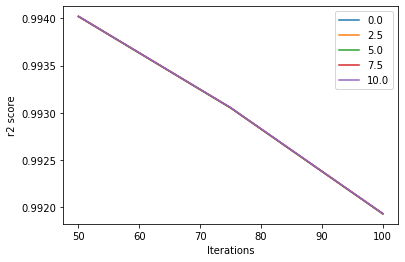

In [31]:
for i in range(len(r2_scr)):
    plt.plot(iterations,r2_scr[i],label=initial_value[i])
    #plt.yticks([0.9910,0.9915,0.9920,0.9925,0.9930,0.9935,0.9940,0.9945,0.9950])
    plt.legend(loc="upper right")
    plt.xlabel("Iterations")
    plt.ylabel("r2 score")

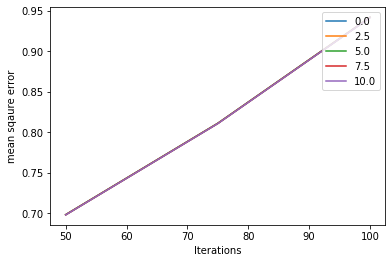

In [25]:
for i in range(len(m_sq_error)):
    plt.plot(iterations,m_sq_error[i],label=initial_value[i])
    #plt.yticks([0.9910,0.9915,0.9920,0.9925,0.9930,0.9935,0.9940,0.9945,0.9950])
    plt.legend(loc="upper right")
    plt.xlabel("Iterations")
    plt.ylabel("mean sqaure error")

In [27]:
airFoil1=Airfoil()
initial_value1=0.0
iterations1=[50,75,100]
l_rate1= [0.001,0.003,0.01,0.03]


r2_scr1=[]
m_sq_error1=[]
m_abs_error1=[]
m_abs_per_error1=[]

for i in range(len(l_rate1)):
    r_score = []
    mean_sq_error = []
    mean_abs_error = []
    mean_abs_per_error = []
    for j in range(len(iterations1)):
        coefficient=airFoil1.fit(X_train,Y_tr,initial_value1,iterations1[j],l_rate1[i])
        predictions=[]
        for k in range(len(Y_test)):
            predictions.append(airFoil1.getPredict(coefficient,Y_test[k]))
        r_score.append(r2_score(Y_ts,predictions))
        mean_sq_error.append(mean_squared_error(Y_ts,predictions))
        mean_abs_error.append(mean_absolute_error(Y_ts,predictions))
        mean_abs_per_error.append(mean_absolute_percentage_error(Y_ts,predictions))
        
    r2_scr1.append(r_score)
    m_sq_error1.append(mean_sq_error)
    m_abs_error1.append(mean_abs_error)
    m_abs_per_error1.append(mean_abs_per_error)

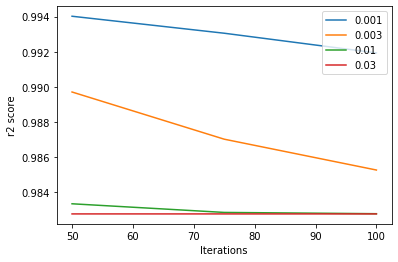

In [29]:
for i in range(len(r2_scr1)):
    plt.plot(iterations,r2_scr1[i],label=l_rate1[i])
    #plt.yticks([0.9910,0.9915,0.9920,0.9925,0.9930,0.9935,0.9940,0.9945,0.9950])
    plt.legend(loc="upper right")
    plt.xlabel("Iterations")
    plt.ylabel("r2 score")

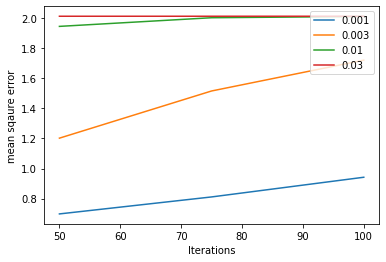

In [30]:
for i in range(len(m_sq_error1)):
    plt.plot(iterations,m_sq_error1[i],label=l_rate1[i])
    #plt.yticks([0.9910,0.9915,0.9920,0.9925,0.9930,0.9935,0.9940,0.9945,0.9950])
    plt.legend(loc="upper right")
    plt.xlabel("Iterations")
    plt.ylabel("mean sqaure error")